In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw5.ipynb")

# CPSC 330 - Applied Machine Learning 

## Homework 5: Putting it all together 
### Associated lectures: All material till lecture 13 

**Due date: Monday, October 28th, 2024 at 11:59pm**

## Table of contents
0. [Submission instructions](#si)
1. [Understanding the problem](#1)
2. [Data splitting](#2)
3. [EDA](#3)
4. [Feature engineering](#4)
5. [Preprocessing and transformations](#5) 
6. [Baseline model](#6)
7. [Linear models](#7)
8. [Different models](#8)
9. [Feature selection](#9)
10. [Hyperparameter optimization](#10)
11. [Interpretation and feature importances](#11) 
12. [Results on the test set](#12)
13. [Summary of the results](#13)
14. [Your takeaway from the course](#15)

<div class="alert alert-info">

## Submission instructions
<hr>
rubric={points:4}

**You may work with a partner on this homework and submit your assignment as a group.** Below are some instructions on working as a group.  
- The maximum group size is 2. 
- Use group work as an opportunity to collaborate and learn new things from each other. 
- Be respectful to each other and make sure you understand all the concepts in the assignment well. 
- It's your responsibility to make sure that the assignment is submitted by one of the group members before the deadline. 
- You can find the instructions on how to do group submission on Gradescope [here](https://help.gradescope.com/article/m5qz2xsnjy-student-add-group-members).
- If you would like to use late tokens for the homework, all group members must have the necessary late tokens available. Please note that the late tokens will be counted for all members of the group.   


Follow the [homework submission instructions](https://github.com/UBC-CS/cpsc330-2024W1/blob/master/docs/homework_instructions.md). 

1. Before submitting the assignment, run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
3. Follow the [CPSC 330 homework instructions](https://ubc-cs.github.io/cpsc330-2024W1/docs/homework_instructions.html), which include information on how to do your assignment and how to submit your assignment.
4. Upload your solution on Gradescope. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope.


_Note: The assignments will get gradually more open-ended as we progress through the course. In many cases, there won't be a single correct solution. Sometimes you will have to make your own choices and your own decisions (for example, on what parameter values to use when they are not explicitly provided in the instructions). Use your own judgment in such cases and justify your choices, if necessary._

</div>

Final test score (in `RMSE`): **1.076** using LGBMRegressor

<!-- BEGIN QUESTION -->

## Imports

<div class="alert alert-warning">
    
Imports
    
</div>

_Points:_ 0

In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from matplotlib import pyplot as plt

from sklearn.dummy import DummyRegressor
from sklearn.compose import make_column_transformer
from sklearn.discriminant_analysis import StandardScaler
from sklearn.compose import make_column_transformer
from sklearn.linear_model import Ridge
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import KBinsDiscretizer, OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import RidgeCV

from lightgbm import LGBMRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import StackingRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.feature_selection import RFECV
import shap 

import warnings
warnings.simplefilter(action="ignore", category=DeprecationWarning)
warnings.simplefilter(action="ignore", category=UserWarning)

<!-- END QUESTION -->

## Introduction <a name="in"></a>

In this homework you will be working on an open-ended mini-project, where you will put all the different things you have learned so far together to solve an interesting problem.

A few notes and tips when you work on this mini-project: 

#### Tips
1. This mini-project is open-ended, and while working on it, there might be some situations where you'll have to use your own judgment and make your own decisions (as you would be doing when you work as a data scientist). Make sure you explain your decisions whenever necessary. 
2. **Do not include everything you ever tried in your submission** -- it's fine just to have your final code. That said, your code should be reproducible and well-documented. For example, if you chose your hyperparameters based on some hyperparameter optimization experiment, you should leave in the code for that experiment so that someone else could re-run it and obtain the same hyperparameters, rather than mysteriously just setting the hyperparameters to some (carefully chosen) values in your code. 
3. If you realize that you are repeating a lot of code try to organize it in functions. Clear presentation of your code, experiments, and results is the key to be successful in this lab. You may use code from lecture notes or previous lab solutions with appropriate attributions. 

#### Assessment
We plan to grade fairly and leniently. We don't have some secret target score that you need to achieve to get a good grade. **You'll be assessed on demonstration of mastery of course topics, clear presentation, and the quality of your analysis and results.** For example, if you just have a bunch of code and no text or figures, that's not good. If you do a bunch of sane things and get a lower accuracy than your friend, don't sweat it.


#### A final note
Finally, this style of this "project" question is different from other assignments. It'll be up to you to decide when you're "done" -- in fact, this is one of the hardest parts of real projects. But please don't spend WAY too much time on this... perhaps "a few hours" (15-20 hours???) is a good guideline for this project . Of course if you're having fun you're welcome to spend as much time as you want! But, if so, try not to do it out of perfectionism or getting the best possible grade. Do it because you're learning and enjoying it. Students from the past cohorts have found such kind of labs useful and fun and I hope you enjoy it as well. 

<br><br>

<!-- BEGIN QUESTION -->

## 1. Pick your problem and explain the prediction problem <a name="1"></a>
<hr>
rubric={points:3}

In this mini project, you have the option to choose on which dataset you will be working on. The tasks you will need to carry on will be similar, independently of your choice.

### Option 1
You can choose to work on a classification problem of predicting whether a credit card client will default or not. 
For this problem, you will use [Default of Credit Card Clients Dataset](https://www.kaggle.com/uciml/default-of-credit-card-clients-dataset). In this data set, there are 30,000 examples and 24 features, and the goal is to estimate whether a person will default (fail to pay) their credit card bills; this column is labeled "default.payment.next.month" in the data. The rest of the columns can be used as features. You may take some ideas and compare your results with [the associated research paper](https://www.sciencedirect.com/science/article/pii/S0957417407006719), which is available through [the UBC library](https://www.library.ubc.ca/). 


### Option 2
You can choose to work on a regression problem using a [dataset](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data) of New York City Airbnb listings from 2019. As usual, you'll need to start by downloading the dataset, then you will try to predict `reviews_per_month`, as a proxy for the popularity of the listing. Airbnb could use this sort of model to predict how popular future listings might be before they are posted, perhaps to help guide hosts create more appealing listings. In reality they might instead use something like vacancy rate or average rating as their target, but we do not have that available here.

> Note there is an updated version of this dataset with more features available [here](http://insideairbnb.com/). The features were are using in `listings.csv.gz` for the New York city datasets. You will also see some other files like `reviews.csv.gz`. For your own interest you may want to explore the expanded dataset and try your analysis there. However, please submit your results on the dataset obtained from Kaggle.


**Your tasks:**

1. Spend some time understanding the options and pick the one you find more interesting (it may help spending some time looking at the documentation available on Kaggle for each dataset).
2. After making your choice, focus on understanding the problem and what each feature means, again using the documentation on the dataset page on Kaggle. Write a few sentences on your initial thoughts on the problem and the dataset. 
3. Download the dataset and read it as a pandas dataframe. 

<div class="alert alert-warning">
    
Solution_1
    
</div>

_Points:_ 3

_I am pursuing option 2, and am thus trying to predict reviews_per_month. I find the problem interesting as it involves predicting something based (at least partially) on longitude-latitude coordinates. However, according to Kaggle, the target has around 10,000 missing values out of around 49,000 rows, which could make training a model challenging as either one-fifth of the reviews_per_month column will be imputed with the same value, or removed entirely._

In [3]:
airbnb = pd.read_csv('data/AB_NYC_2019.csv')
airbnb.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3647,THE VILLAGE OF HARLEM....NEW YORK !,4632,Elisabeth,Manhattan,Harlem,40.80902,-73.94190,Private room,150,3,0,NaN,NaN,1,365
3,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
4,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 2. Data splitting <a name="2"></a>
<hr>
rubric={points:2}

**Your tasks:**

1. Split the data into train (70%) and test (30%) portions with `random_state=123`.

> If your computer cannot handle training on 70% training data, make the test split bigger.  

<div class="alert alert-warning">
    
Solution_2
    
</div>

_Points:_ 2

In [4]:
train_df, test_df = train_test_split(airbnb, train_size=0.7, random_state=123)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 3. EDA <a name="3"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Perform exploratory data analysis on the train set.
2. Include at least two summary statistics and two visualizations that you find useful, and accompany each one with a sentence explaining it.
3. Summarize your initial observations about the data. 
4. Pick appropriate metric/metrics for assessment. 

<div class="alert alert-warning">
    
Solution_3
    
</div>

_Points:_ 10

_Here, we see that are 34226 entries (rows) in the training data. Thus, columns with less than 34226 non-null entries contain null values, and thus should be imputed **if** they will be used for training. Those columns are: `name`, `host_name`, `last_review`, and `reviews_per_month`._

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 34226 entries, 36150 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              34226 non-null  int64  
 1   name                            34216 non-null  object 
 2   host_id                         34226 non-null  int64  
 3   host_name                       34209 non-null  object 
 4   neighbourhood_group             34226 non-null  object 
 5   neighbourhood                   34226 non-null  object 
 6   latitude                        34226 non-null  float64
 7   longitude                       34226 non-null  float64
 8   room_type                       34226 non-null  object 
 9   price                           34226 non-null  int64  
 10  minimum_nights                  34226 non-null  int64  
 11  number_of_reviews               34226 non-null  int64  
 12  last_review                     2

_The following displays the ranges of the numeric columns, which is useful in determining which should be scaled. All of them have different ranges, so all the numeric columns that are useful in training should be scaled._

In [6]:
train_df.describe()

,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,3.422600e+04,3.422600e+04,34226.000000,34226.000000,34226.000000,34226.000000,34226.000000,27236.000000,34226.000000,34226.000000
mean,1.893979e+07,6.726273e+07,40.729142,-73.952083,151.528399,7.094957,23.244814,1.369816,7.042453,112.526004
std,1.101332e+07,7.840511e+07,0.054531,0.046201,236.628392,21.548290,44.573323,1.700737,32.590803,131.420031
min,2.539000e+03,2.438000e+03,40.506410,-74.244420,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,9.394482e+06,7.721897e+06,40.690193,-73.983030,69.000000,1.000000,1.000000,0.190000,1.000000,0.000000
50%,1.954546e+07,3.074526e+07,40.723240,-73.955550,106.000000,3.000000,5.000000,0.710000,1.000000,45.000000
75%,2.915085e+07,1.068375e+08,40.763287,-73.936270,175.000000,5.000000,23.000000,2.000000,2.000000,225.750000
max,3.648561e+07,2.743213e+08,40.912340,-73.712990,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


_We can also find two summary statistics of interest here: mean and max of `reviews_per_month`. Even though the mean of `reviews_per_month` in the training set is around 1.37, the maximum is an astounding 58.5! I investigated further to find the largest values of `reviews_per_month` in order to see if this was an extreme outlier._

In [7]:
train_df.sort_values('reviews_per_month', ascending=False)[['reviews_per_month']].head()

,reviews_per_month
42075,58.50
42076,27.95
38870,20.94
27287,19.75
28651,17.82


_Indeed, the listing with 58.5 reviews per month is a large outlier, more than twice as large as the next largest value. Even though scaling would solve the issue of having this large outlier point, I have chosen to remove it so that the upcoming visualizations look nicer. The range of `reviews_per_month` is halved, so the visualizations are more clear now._

In [8]:
outlier_index = train_df["reviews_per_month"].idxmax()
train_df = train_df.drop(outlier_index)

<Axes: title={'center': 'Plot of number of AirBNB reviews in NYC'}, xlabel='longitude', ylabel='latitude'>

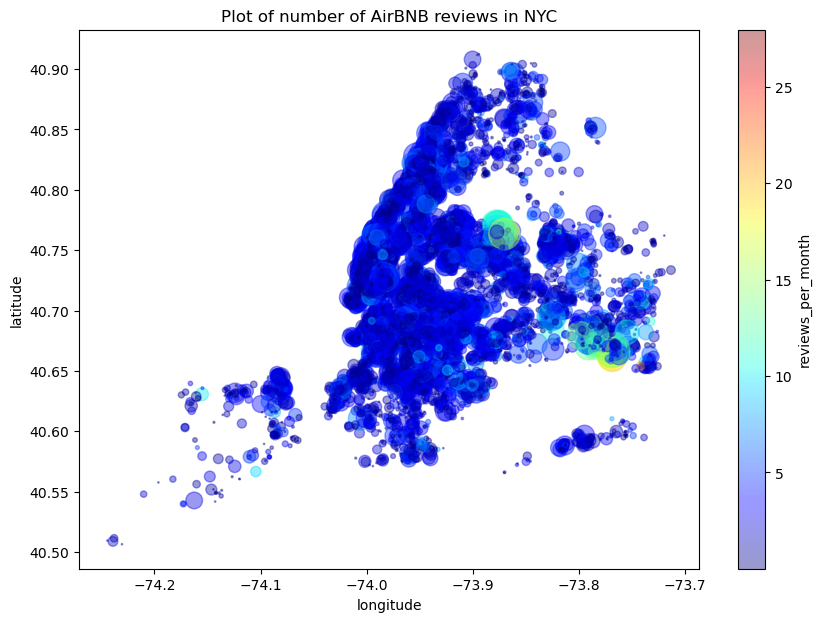

In [9]:
# Code modified from lecture 5 in textbook
# https://ubc-cs.github.io/cpsc330-2024W1/lectures/notes/05_preprocessing-pipelines.html

train_df.plot(
    kind="scatter",
    x="longitude",
    y="latitude",
    title="Plot of number of AirBNB reviews in NYC",
    alpha=0.4,
    s=train_df["number_of_reviews"],
    figsize=(10, 7),
    c="reviews_per_month",
    cmap=plt.get_cmap("jet"),
    colorbar=True,
    sharex=False,
)

_The visualization above indicates that there may be a relation between the specific location in New York City and the number of reviews a listing gets per month, so latitude and longitude are potentially useful features for prediction._

_The scatter plot below shows that there is some linear relation between the number of reviews per month and the number of reviews in total, thus it may be very valuable to use for training._

<Axes: title={'center': 'reviews_per_month vs number_of_reviews'}, xlabel='number_of_reviews', ylabel='reviews_per_month'>

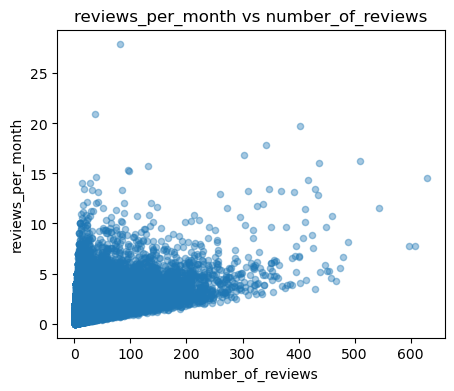

In [10]:
train_df.plot(
    kind="scatter",
    title="reviews_per_month vs number_of_reviews",
    x='number_of_reviews',
    y="reviews_per_month",
    alpha=0.4,
    figsize=(5, 4)
)

_Lastly, I will be using RMSE as a scoring metric because this is a regression problem and MAPE isn't as beneficial in this problem. Since most `reviews_per_month` values are around 1, then RMSE is fine to use and somewhat more interpretable than MAPE, which uses percentages instead of number of reviews as a metric. If `reviews_per_month` had more points around a wider distribution than currently, then MAPE would be more beneficial._

In [11]:
scoring_metric = "neg_root_mean_squared_error"

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 4. Feature engineering <a name="4"></a>
<hr>
rubric={points:1}

**Your tasks:**

1. Carry out feature engineering. In other words, extract new features relevant for the problem and work with your new feature set in the following exercises. You may have to go back and forth between feature engineering and preprocessing. 

<div class="alert alert-warning">
    
Solution_4
    
</div>

_Points:_ 1

_Before I continue, I first drop all rows where `reviews_per_month` is null in both the train and test data. I am aware that this may shift the 70/30 split slightly, but I do not want to risk breaking the golden rule by creating new train and test splits. Additionally, there should still be a lot of data in both splits to not warrant re-splitting._

In [12]:
# Ensures that CountVectorizer works on name
train_df['name'] = train_df['name'].fillna('')
test_df['name'] = test_df['name'].fillna('')

# Remove rows where reviews_per_month is null
train_df = train_df.dropna(subset=['reviews_per_month'])
test_df = test_df.dropna(subset=['reviews_per_month'])
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27235 entries, 20195 to 15725
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              27235 non-null  int64  
 1   name                            27235 non-null  object 
 2   host_id                         27235 non-null  int64  
 3   host_name                       27222 non-null  object 
 4   neighbourhood_group             27235 non-null  object 
 5   neighbourhood                   27235 non-null  object 
 6   latitude                        27235 non-null  float64
 7   longitude                       27235 non-null  float64
 8   room_type                       27235 non-null  object 
 9   price                           27235 non-null  int64  
 10  minimum_nights                  27235 non-null  int64  
 11  number_of_reviews               27235 non-null  int64  
 12  last_review                     2

_For feature engineering, I will discretize `latitude` and `longitude` since each coordinate doesn't need to be floating-point precise. This should occur in a column transformer, thus it is performed on the next step. The same line of reasoning also follows with `number_of_reviews`.I will also do the same to `calculated_host_listings_count` and `availability_365` because those features bin very nicely, and the plot below shows that the two may be related. Lastly, I binned `price` and `minimum_nights` together since they are somewhat related and lead to greater cross-validation scores when binned than without binning._


<Axes: title={'center': 'calculated_host_listings_count vs. availability_365'}, xlabel='calculated_host_listings_count', ylabel='availability_365'>

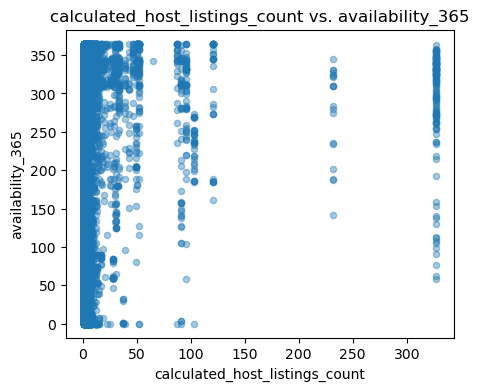

In [13]:
train_df.plot(
    kind="scatter",
    title="calculated_host_listings_count vs. availability_365",
    x='calculated_host_listings_count',
    y="availability_365",
    alpha=0.4,
    figsize=(5, 4)
)

In [14]:
X_train, y_train = train_df.drop(columns=['reviews_per_month']), train_df['reviews_per_month']
X_test, y_test = test_df.drop(columns=['reviews_per_month']), test_df['reviews_per_month']

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 5. Preprocessing and transformations <a name="5"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Identify different feature types and the transformations you would apply on each feature type. 
2. Define a column transformer, if necessary. 

<div class="alert alert-warning">
    
Solution_5
    
</div>

_Points:_ 10

In [15]:
categorical_feats = ["neighbourhood_group", "neighbourhood", "room_type"]
numerical_feats = ["number_of_reviews", "price", "minimum_nights", "calculated_host_listings_count", "availability_365"]
text_feat = "name"
drop_feats = ["id", "host_id", "last_review", "host_name"]

In [16]:
preprocessor = make_column_transformer(
    (StandardScaler(), numerical_feats),
    (OneHotEncoder(handle_unknown="ignore"), categorical_feats),
    (KBinsDiscretizer(n_bins=50, encode="onehot"), ["latitude", "longitude"]),
    (KBinsDiscretizer(n_bins=50, encode="onehot"), ["price", "minimum_nights"]),
    (KBinsDiscretizer(n_bins=50, encode="onehot"), ["number_of_reviews"]),     
    (KBinsDiscretizer(n_bins=50, encode="onehot"), ["calculated_host_listings_count", "availability_365"]),
    (CountVectorizer(stop_words="english"), text_feat),
    ("drop", drop_feats),
)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 6. Baseline model <a name="6"></a>
<hr>
rubric={points:2}

**Your tasks:**
1. Try `scikit-learn`'s baseline model and report results.

<div class="alert alert-warning">
    
Solution_6
    
</div>

_Points:_ 2

In [17]:
# Fitting the baseline model
dummy = DummyRegressor()
dummy.fit(X_train, y_train)

DummyRegressor()

In [18]:
dummy.score(X_train, y_train) # R2 score

0.0

In [19]:
y_pred_dummy = dummy.predict(X_train)
np.sqrt(mean_squared_error(y_train, y_pred_dummy)) # RMSE score

1.6651312083706236

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 7. Linear models <a name="7"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Try a linear model as a first real attempt. 
2. Carry out hyperparameter tuning to explore different values for the complexity hyperparameter. 
3. Report cross-validation scores along with standard deviation. 
4. Summarize your results.

<div class="alert alert-warning">
    
Solution_7
    
</div>

_Points:_ 10

_Through cross-validation, the best `alpha` value was found to be 10.0. Cross-validation with this `alpha` value gives a mean RMSE score of 1.1712 and a small standard deviation of 0.04. Comparing this to without hyperparameter tuning (`alpha = 1`), where the cross-validation mean is 1.1919 and standard deviation is 0.0377. Thus hyperparameter optimization decreased the error of the model._

In [20]:
# Ridge with default alpha value
ridge = make_pipeline(preprocessor, Ridge())
ridge.fit(X_train, y_train)
print(ridge.score(X_train, y_train)) # R2 score

untuned_ridge_cv_df = pd.DataFrame(cross_validate(
        ridge,
        X_train, y_train, 
        cv=10, return_train_score=True, scoring=scoring_metric)
)
print(f"Cross-validation score mean of untuned ridge: {untuned_ridge_cv_df["test_score"].mean():.4f}")
print(f"Cross-validation score standard deviation of untuned ridge: {untuned_ridge_cv_df["test_score"].std():.4f}")

0.6209328574830881
Cross-validation score mean of untuned ridge: -1.1919
Cross-validation score standard deviation of untuned ridge: 0.0377


In [21]:
alphas = 10.0 ** np.arange(-6, 6, 1)
pipe_ridgecv = make_pipeline(preprocessor, RidgeCV(alphas=alphas, cv=10, scoring=scoring_metric))
pipe_ridgecv.fit(X_train, y_train);
best_alpha = pipe_ridgecv.named_steps["ridgecv"].alpha_

best_alpha

10.0

In [22]:
tuned_ridge = make_pipeline(preprocessor, Ridge(alpha=best_alpha))

cv_df = pd.DataFrame(cross_validate(
        tuned_ridge,
        X_train, y_train, 
        cv=10, return_train_score=True, scoring=scoring_metric)
)
cv_df

,fit_time,score_time,test_score,train_score
0,0.238257,0.019615,-1.164386,-1.092904
1,0.232840,0.017213,-1.192088,-1.090624
2,0.233431,0.025997,-1.250473,-1.083577
3,0.233009,0.020657,-1.147862,-1.094652
4,0.232617,0.024980,-1.163361,-1.092138
5,0.240756,0.024900,-1.171392,-1.091380
6,0.232909,0.024870,-1.127701,-1.095395
7,0.232523,0.027044,-1.167112,-1.092352
8,0.232680,0.029043,-1.213807,-1.087182
9,0.232954,0.024862,-1.113810,-1.097904


In [23]:
print(f"Cross-validation score mean: {cv_df["test_score"].mean():.4f}")
print(f"Cross-validation score standard deviation: {cv_df["test_score"].std():.4f}")

tuned_ridge.fit(X_train, y_train)
pred_y_tuned_ridge = tuned_ridge.predict(X_train)
np.sqrt(mean_squared_error(y_train, pred_y_tuned_ridge)) # RMSE on train data

Cross-validation score mean: -1.1712
Cross-validation score standard deviation: 0.0400


1.09413702269273

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 8. Different models <a name="8"></a>
<hr>
rubric={points:12}

**Your tasks:**
1. Try at least 3 other models aside from a linear model. One of these models should be a tree-based ensemble model. 
2. Summarize your results in terms of overfitting/underfitting and fit and score times. Can you beat a linear model? 

<div class="alert alert-warning">
    
Solution_8
    
</div>

_Points:_ 12

_All the models are performing similarly on cross-validation, however Stacking seems to be performing the best because it has the largest cross-validation score and a small train score, meaning that it is likely not overfitting a lot. LightGBM also doesn't appear to be overfitting much as its train score is low, but its cross-validation score is also low. As for XGBoost, it seems to be performing as well as LightGBM, but with even less overfitting. Lastly, the Gradient Boosting model has the worst cross-validation score, but also seems to be overfitting the most._

_All of these models have higher cross-validation scores than Ridge though, which makes sense as more complex models tend to be more accurate than less complex ones._

In [24]:
# From Lecture 5 in textbook
def mean_std_cross_val_scores(model, X_train, y_train, **kwargs):
    """
    Returns mean and std of cross validation

    Parameters
    ----------
    model :
        scikit-learn model
    X_train : numpy array or pandas DataFrame
        X in the training data
    y_train :
        y in the training data

    Returns
    ----------
        pandas Series with mean scores from cross_validation
    """

    scores = cross_validate(model, X_train, y_train, **kwargs)

    mean_scores = pd.DataFrame(scores).mean()
    std_scores = pd.DataFrame(scores).std()
    out_col = []

    for i in range(len(mean_scores)):
        out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))

    return pd.Series(data=out_col, index=mean_scores.index)

In [25]:
# Modified from lecture 12 in textbook

pipe_lgbm = make_pipeline(
    preprocessor, 
    LGBMRegressor(random_state=123, verbose=-1, n_jobs=-1)
)

pipe_xgb = make_pipeline(
    preprocessor,
    XGBRegressor(random_state=123, verbosity=0, n_jobs=-1),
)

pipe_sklearn_GB = make_pipeline(
    preprocessor,
    GradientBoostingRegressor(random_state=123),
)

regressors = {
    "XGBoost": pipe_xgb,
    "LightGBM": pipe_lgbm,
    "sklearn_GB": pipe_sklearn_GB,
}

results = {}

# Inputting previous models into results to make comparison easier
results["Dummy"] = mean_std_cross_val_scores(
    dummy, X_train, y_train, return_train_score=True, scoring=scoring_metric
)
results["Tuned Ridge"] = mean_std_cross_val_scores(
    tuned_ridge, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

# New models
for (name, model) in regressors.items():
    results[name] = mean_std_cross_val_scores(
        model, X_train, y_train, return_train_score=True, scoring=scoring_metric
    )

C:\Users\matij\AppData\Local\Temp\ipykernel_18308\909153353.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
C:\Users\matij\AppData\Local\Temp\ipykernel_18308\909153353.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))
C:\Users\matij\AppData\Local\Temp\ipykernel_18308\909153353.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To a

In [26]:
pipe_stack = make_pipeline(
    StackingRegressor(list(regressors.items()))
)
pipe_stack.fit(X_train, y_train)
results["Stacking"] = mean_std_cross_val_scores(
    pipe_stack, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

C:\Users\matij\AppData\Local\Temp\ipykernel_18308\909153353.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


In [27]:
pd.DataFrame(results).T

,fit_time,score_time,test_score,train_score
Dummy,0.003 (+/- 0.004),0.000 (+/- 0.000),-1.665 (+/- 0.028),-1.665 (+/- 0.007)
Tuned Ridge,0.215 (+/- 0.009),0.033 (+/- 0.001),-1.175 (+/- 0.020),-1.089 (+/- 0.004)
XGBoost,0.458 (+/- 0.062),0.066 (+/- 0.007),-1.112 (+/- 0.011),-0.894 (+/- 0.005)
LightGBM,0.406 (+/- 0.023),0.064 (+/- 0.003),-1.101 (+/- 0.018),-0.972 (+/- 0.004)
sklearn_GB,4.085 (+/- 2.145),0.047 (+/- 0.004),-1.146 (+/- 0.015),-1.096 (+/- 0.003)
Stacking,36.679 (+/- 6.198),0.241 (+/- 0.006),-1.095 (+/- 0.017),-0.927 (+/- 0.006)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 9. Feature selection <a name="9"></a>
<hr>
rubric={points:2}

**Your tasks:**

Make some attempts to select relevant features. You may try `RFECV` or forward selection for this. Do the results improve with feature selection? Summarize your results. If you see improvements in the results, keep feature selection in your pipeline. If not, you may abandon it in the next exercises. 

<div class="alert alert-warning">
    
Solution_9
    
</div>

_Points:_ 2

_I used `RFECV`, however it is limiting as I cannot put categorical nor text features, even when they are processed. Out of all numerical features, it found that `id` and `host_id` were useful features and `price` and `latitude` less useful, which is strange. I used LightGBM with these features, which then lead to a strange negative RMSE since it is positive. This may imply that this model with the selected (and not selected) features is worse than our previous models, and thus shouldn't be used. Even when the categorical features that were deemed to be useless were reinserted into the model, the score remains insignificantly changed._

In [28]:
# I found the set_output fix here: https://stackoverflow.com/questions/71509883/recovering-features-names-of-standardscaler-fit-transform-with-sklearn
scaler = StandardScaler().set_output(transform="pandas")

# Cannot be in RFECV, even if I put a pipeline with preprocessor for `estimator` in RFECV
X_train_processed = X_train.drop(columns=["name", "host_name", "neighbourhood_group", "neighbourhood", "room_type", "last_review"])
X_train_processed = scaler.fit_transform(X_train_processed)
X_train_processed = pd.DataFrame(X_train_processed)

rfe_cv = RFECV(Ridge(max_iter=1000), cv=10) 
rfe_cv.fit(X_train_processed, y_train)


RFECV(cv=10, estimator=Ridge(max_iter=1000))

In [29]:
print(rfe_cv.support_)
print(X_train_processed.columns[rfe_cv.support_])

[ True  True False  True False  True  True  True  True]
Index(['id', 'host_id', 'longitude', 'minimum_nights', 'number_of_reviews',
       'calculated_host_listings_count', 'availability_365'],
      dtype='object')


In [30]:
rfe_cv.ranking_ # id and host_id are top-ranked features, while price is lowest ranked

array([1, 1, 2, 1, 3, 1, 1, 1, 1])

In [31]:
preprocessor2 = make_column_transformer(
    (StandardScaler(), numerical_feats),   
    ("drop", ["host_name", "neighbourhood_group", "neighbourhood", "room_type", "last_review", "latitude", "price"]),
)

rfe_pipe_lgbm = make_pipeline(
    preprocessor2,
    LGBMRegressor(random_state=123, verbose=-1, n_jobs=-1)
)
results["RFE_LGBM"] = mean_std_cross_val_scores(rfe_pipe_lgbm, X_train, y_train, return_train_score=True)
pd.DataFrame(results).T

C:\Users\matij\AppData\Local\Temp\ipykernel_18308\909153353.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.003 (+/- 0.004),0.000 (+/- 0.000),-1.665 (+/- 0.028),-1.665 (+/- 0.007)
Tuned Ridge,0.215 (+/- 0.009),0.033 (+/- 0.001),-1.175 (+/- 0.020),-1.089 (+/- 0.004)
XGBoost,0.458 (+/- 0.062),0.066 (+/- 0.007),-1.112 (+/- 0.011),-0.894 (+/- 0.005)
LightGBM,0.406 (+/- 0.023),0.064 (+/- 0.003),-1.101 (+/- 0.018),-0.972 (+/- 0.004)
sklearn_GB,4.085 (+/- 2.145),0.047 (+/- 0.004),-1.146 (+/- 0.015),-1.096 (+/- 0.003)
Stacking,36.679 (+/- 6.198),0.241 (+/- 0.006),-1.095 (+/- 0.017),-0.927 (+/- 0.006)
RFE_LGBM,0.474 (+/- 0.025),0.006 (+/- 0.009),0.525 (+/- 0.009),0.606 (+/- 0.003)


<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 10. Hyperparameter optimization <a name="10"></a>
<hr>
rubric={points:10}

**Your tasks:**

Make some attempts to optimize hyperparameters for the models you've tried and summarize your results. In at least one case you should be optimizing multiple hyperparameters for a single model. You may use `sklearn`'s methods for hyperparameter optimization or fancier Bayesian optimization methods. 
  - [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html)   
  - [RandomizedSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html)
  - [scikit-optimize](https://github.com/scikit-optimize/scikit-optimize) 

<div class="alert alert-warning">
    
Solution_10
    
</div>

_Points:_ 10

_Even though the Stacking model seems to be performing better, I will optimize LightGBM instead because it is faster. There is some accuracy tradeoff, but it isn't too much._

_It seems that the lowest RMSE occurs when `max_features` for the `CountVectorizer` is 800, `LGBMRegressor`'s `num_leaves` hyperparameter is 80, `max_depth` is -1 (so no limit on the tree depth), `learning_rate is 0.1` and `n_estimators` is 100. In this case, the cross-validation score is 1.093, which is better than with default hyperparameters._

_For Ridge, randomized search gave me the same `alpha` value as `RidgeCV`, even though then I was not optimizing `max_features`. However, the cross validation score here is quite a bit lower (which means its more accurate) which could either be the cause of simple randomization or that the `max_features` hyperparameter also has a noticeable effect or both._ 

_Finally, I also tried to optimize the XGBoost model's hyperparameters as well to see how similar it would be to LGBM. However, it took significantly longer to perform less iterations, so the results that I have received are inconclusive._

In [32]:
pipe_lgbm

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['number_of_reviews', 'price',
                                                   'minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['neighbourhood_group',
                                                   'neighbourhood',
                                                   'room_type']),
                                                 ('kbinsdiscretizer-1',
                                                  KBinsDiscretize...
                                                  KBinsDiscretizer(n_bins=50),
                                                  ['number_of_reviews']),
                                                 ('kbinsdiscretizer-4',
                                                  KBinsDiscretizer(n_bins=50),
                                                  ['calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('countvectorizer',
                                                  CountVectorizer(stop_words='english'),
                                                  'name'),
                                                 ('drop', 'drop',
                                                  ['id', 'host_id',
                                                   'last_review',
                                                   'host_name'])])),
                ('lgbmregressor',
                 LGBMRegressor(n_jobs=-1, random_state=123, verbose=-1))])

In [33]:
# modified from lecture 8 textbook
param_grid = {
    "columntransformer__countvectorizer__max_features": [25, 50, 100, 200, 400, 800],
    'lgbmregressor__num_leaves': [20, 40, 60, 80, 100, 120],
    'lgbmregressor__max_depth': [-1, 10, 20, 30],
    'lgbmregressor__learning_rate': [0.01, 0.1, 0.2],
    'lgbmregressor__n_estimators': [50, 100, 150, 200]
}

print("Grid size: %d" % (np.prod(list(map(len, param_grid.values())))))

Grid size: 1728


In [34]:
lgbm_random_search = RandomizedSearchCV(pipe_lgbm,                                    
                  param_distributions = param_grid, 
                  n_iter=50, 
                  n_jobs=-1, 
                  return_train_score=True,
                  scoring=scoring_metric,
                  random_state=123)
lgbm_random_search.fit(X_train, y_train)

RandomizedSearchCV(estimator=Pipeline(steps=[('columntransformer',
                                              ColumnTransformer(transformers=[('standardscaler',
                                                                               StandardScaler(),
                                                                               ['number_of_reviews',
                                                                                'price',
                                                                                'minimum_nights',
                                                                                'calculated_host_listings_count',
                                                                                'availability_365']),
                                                                              ('onehotencoder',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['neighbourhood_group',
                                                                                'neighbourhood',
                                                                                'room_type']),
                                                                              ('kbinsd...
                   param_distributions={'columntransformer__countvectorizer__max_features': [25,
                                                                                             50,
                                                                                             100,
                                                                                             200,
                                                                                             400,
                                                                                             800],
                                        'lgbmregressor__learning_rate': [0.01,
                                                                         0.1,
                                                                         0.2],
                                        'lgbmregressor__max_depth': [-1, 10, 20,
                                                                     30],
                                        'lgbmregressor__n_estimators': [50, 100,
                                                                        150,
                                                                        200],
                                        'lgbmregressor__num_leaves': [20, 40,
                                                                      60, 80,
                                                                      100,
                                                                      120]},
                   random_state=123, return_train_score=True,
                   scoring='neg_root_mean_squared_error')

In [35]:
pd.DataFrame(lgbm_random_search.cv_results_)[
    [
        "mean_test_score",
        "param_columntransformer__countvectorizer__max_features", 
        "param_lgbmregressor__num_leaves",
        "param_lgbmregressor__max_depth",
        "param_lgbmregressor__learning_rate",
        "param_lgbmregressor__n_estimators",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T[1]

mean_test_score                                            -1.092645
param_columntransformer__countvectorizer__max_features    800.000000
param_lgbmregressor__num_leaves                            80.000000
param_lgbmregressor__max_depth                             -1.000000
param_lgbmregressor__learning_rate                          0.100000
param_lgbmregressor__n_estimators                         100.000000
mean_fit_time                                              14.952184
Name: 1, dtype: float64

In [36]:
ridge_param_grid = {
    "columntransformer__countvectorizer__max_features": [25, 50, 100, 200, 400, 800],
    'ridge__alpha': np.logspace(-3, 1, 5)
}

ridge_random_search = RandomizedSearchCV(ridge,
                  param_distributions = ridge_param_grid, 
                  n_iter=50, 
                  n_jobs=-1, 
                  return_train_score=True,
                  scoring=scoring_metric,
                  random_state=123)
ridge_random_search.fit(X_train, y_train)
pd.DataFrame(ridge_random_search.cv_results_)[
    [
        "mean_test_score",
        "param_columntransformer__countvectorizer__max_features", 
        "param_ridge__alpha",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T[1]

mean_test_score                                            -1.179012
param_columntransformer__countvectorizer__max_features    800.000000
param_ridge__alpha                                         10.000000
mean_fit_time                                               0.930557
Name: 1, dtype: float64

In [37]:
xgb_param_grid = {
    "columntransformer__countvectorizer__max_features": [25, 50, 100, 200, 400, 800],
    'xgbregressor__num_leaves': [20, 40, 60, 80, 100, 120],
    'xgbregressor__max_depth': [0, 10, 20, 30],
    'xgbregressor__learning_rate': [0.01, 0.1, 0.2],
    'xgbregressor__n_estimators': [50, 100, 150, 200]
}

xgb_random_search = RandomizedSearchCV(pipe_xgb,                               
                  param_distributions = xgb_param_grid, 
                  n_iter=2, # increase if possible
                  n_jobs=-1, 
                  return_train_score=True,
                  scoring=scoring_metric,
                  random_state=123)
xgb_random_search.fit(X_train, y_train)
pd.DataFrame(xgb_random_search.cv_results_)[
    [
        "mean_test_score",
        "param_columntransformer__countvectorizer__max_features", 
        "param_xgbregressor__num_leaves",
        "param_xgbregressor__max_depth",
        "param_xgbregressor__learning_rate",
        "param_xgbregressor__n_estimators",
        "mean_fit_time",
        "rank_test_score",
    ]
].set_index("rank_test_score").sort_index().T[1]

mean_test_score                                            -1.121841
param_columntransformer__countvectorizer__max_features    400.000000
param_xgbregressor__num_leaves                             80.000000
param_xgbregressor__max_depth                              10.000000
param_xgbregressor__learning_rate                           0.200000
param_xgbregressor__n_estimators                          200.000000
mean_fit_time                                               5.273520
Name: 1, dtype: float64

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 11. Interpretation and feature importances <a name="1"></a>
<hr>
rubric={points:10}

**Your tasks:**

1. Use the methods we saw in class (e.g., `shap`) (or any other methods of your choice) to examine the most important features of one of the non-linear models. 
2. Summarize your observations. 

<div class="alert alert-warning">
    
Solution_11
    
</div>

_Points:_ 10

_From the summary SHAP plot of the LGBM model, it seems that `number_of_reviews` is the most important feature for predicting `reviews_per_month`. This makes sense as even one of the previous diagrams showed that there was a strong linear correlation between `reviews_per_month` and `number_of_reviews`._

_The next most important features are `minimum_nights` and `availability_365`. It appears that listings that have low `minimum_nights` requirement are more likely to get more reviews. Furthermore, low `availability_365` values tends to lead to lower `reviews_per_month` values. This also makes sense as people as a low `minimum_nights` requirement and high `availability_365` means that a listing could potentially have more tenants, thus more reviews. Especially if those are short-term bookings, so `reviews_per_month` will increase._

_There are many other features that, when they are high, increase the chance that `reviews_per_month` is large, but when they are low, do not affect it at all. This means that prediction can be tricky, since there are signs that a prediction may have high `reviews_per_month`, but there are no signs if it has low `reviews_per_month`._

In [38]:
preprocessor

ColumnTransformer(transformers=[('standardscaler', StandardScaler(),
                                 ['number_of_reviews', 'price',
                                  'minimum_nights',
                                  'calculated_host_listings_count',
                                  'availability_365']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore'),
                                 ['neighbourhood_group', 'neighbourhood',
                                  'room_type']),
                                ('kbinsdiscretizer-1',
                                 KBinsDiscretizer(n_bins=50),
                                 ['latitude', 'longitude']...
                                 KBinsDiscretizer(n_bins=50),
                                 ['price', 'minimum_nights']),
                                ('kbinsdiscretizer-3',
                                 KBinsDiscretizer(n_bins=50),
                                 ['number_of_reviews']),
                                ('kbinsdiscretizer-4',
                                 KBinsDiscretizer(n_bins=50),
                                 ['calculated_host_listings_count',
                                  'availability_365']),
                                ('countvectorizer',
                                 CountVectorizer(stop_words='english'),
                                 'name'),
                                ('drop', 'drop',
                                 ['id', 'host_id', 'last_review',
                                  'host_name'])])

In [39]:
shap.initjs()

In [40]:
ohe_columns = list(
    preprocessor.named_transformers_["onehotencoder"]
    .get_feature_names_out(categorical_feats)
)
# This category has a comma, which is a special JSON character so it leads to an error
# Here, I change , to __ so there is no error.
for i, n in enumerate(ohe_columns):
    if n == "neighbourhood_Bay Terrace, Staten Island":
        ohe_columns[i] = "neighbourhood_Bay Terrace__Staten Island"

text_cols = list(
    preprocessor.named_transformers_["countvectorizer"].get_feature_names_out()
)
# There is a column that results from countvectorizer that is named price
# This makes a duplicate with the actual price feature so I renamed the countvectorizer
# one with price_2
for i, n in enumerate(text_cols):
    if n == "price":
        text_cols[i] = "price_2"

bin1_cols = list(
    preprocessor.named_transformers_["kbinsdiscretizer-1"].get_feature_names_out()
)
bin2_cols = list(
    preprocessor.named_transformers_["kbinsdiscretizer-2"].get_feature_names_out()
)
bin3_cols = list(
    preprocessor.named_transformers_["kbinsdiscretizer-3"].get_feature_names_out()
)
bin4_cols = list(
    preprocessor.named_transformers_["kbinsdiscretizer-4"].get_feature_names_out()
)

new_columns = (
    numerical_feats + ohe_columns + bin1_cols + bin2_cols + bin3_cols + bin4_cols + text_cols
)

In [41]:
X_train_enc = pd.DataFrame(
    preprocessor.transform(X_train).toarray(), index=X_train.index, columns=new_columns
)
X_train_enc.head()

,number_of_reviews,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,숙소,안전하고,조용한,주변,한성,ｱｸｾｽ抜群,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,ﾆｭｰﾖｰｸの中心,ﾏﾝﾊｯﾀﾝ10分,ﾐｯﾄﾞﾀｳﾝｳｴｽﾄｻｲﾄﾞ
20195,-0.585360,0.312183,-0.155191,-0.157722,-0.886334,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18702,1.718238,0.452323,-0.103194,-0.157722,0.164393,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34780,-0.585360,0.317573,0.052797,-0.081145,0.372994,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23690,-0.460841,0.452323,-0.103194,-0.119434,-0.824527,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36152,-0.585360,0.856575,-0.259185,-0.157722,-0.886334,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


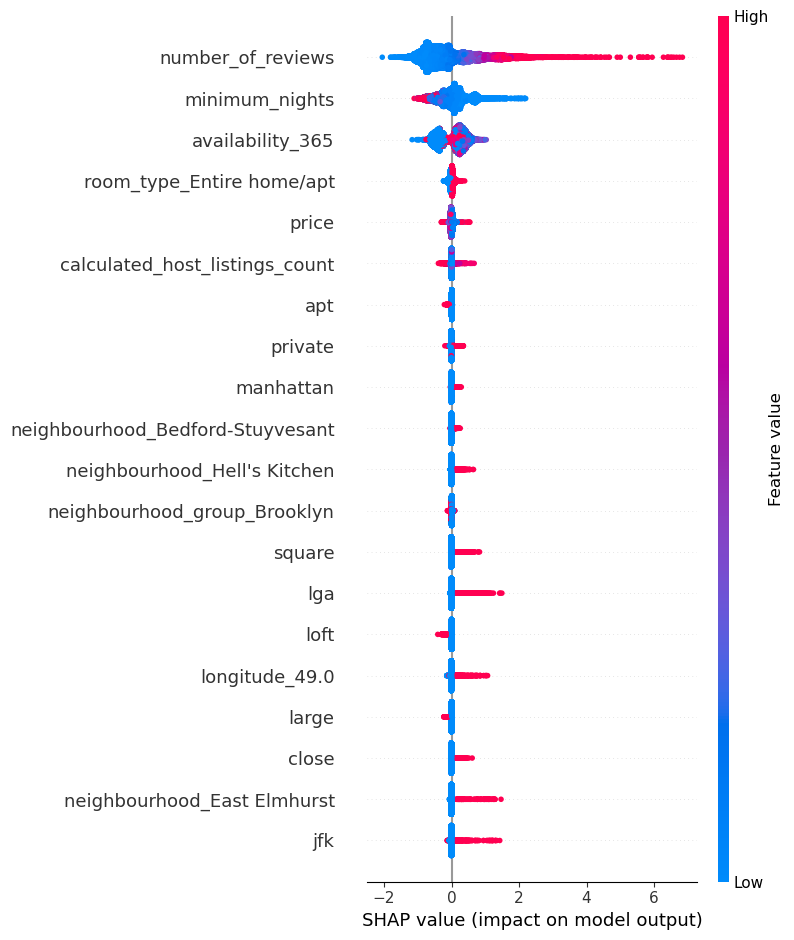

In [42]:
# Adapted from lecture 13 textbook
model = pipe_lgbm.named_steps["lgbmregressor"]
model.fit(X_train_enc, y_train)

explainer = shap.TreeExplainer(model)
train_shap_values = explainer(X_train_enc)

shap.summary_plot(train_shap_values, X_train_enc)

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 12. Results on the test set <a name="12"></a>
<hr>

rubric={points:10}

**Your tasks:**

1. Try your best performing model on the test data and report test scores. 
2. Do the test scores agree with the validation scores from before? To what extent do you trust your results? Do you think you've had issues with optimization bias? 
3. Take one or two test predictions and explain these individual predictions (e.g., with SHAP force plots).  

<div class="alert alert-warning">
    
Solution_12
    
</div>

_Points:_ 10

_The RMSE score is similar to the cross-validation score for LGBM. The optimized LGBM model has a mean cross-validation score of 1.1790 while for the test set, it has a score of 1.0758. We got lucky here as the score for the test set is slightly better than the cross-validation score. This error means that the true number of monthly reviews is approximately +- 1 from the predicted value._

_Since the score is close to the cross-validation results, then I trust this result. I may have had some issues with optimization bias, but because cross-validation takes a lot of time on my machine, I had to limit it, thus I didn't use it too much. Indeed, on totally unseen data, the score was better in this case, which may be considered evidence that the model is not overfit on the training nor validation sets._

In [43]:
preprocessor3 = make_column_transformer(
    (StandardScaler(), numerical_feats),
    (OneHotEncoder(handle_unknown="ignore"), categorical_feats),
    (KBinsDiscretizer(n_bins=50, encode="onehot"), ["latitude", "longitude"]),
    (KBinsDiscretizer(n_bins=50, encode="onehot"), ["price", "minimum_nights"]),
    (KBinsDiscretizer(n_bins=50, encode="onehot"), ["number_of_reviews"]),     
    (KBinsDiscretizer(n_bins=50, encode="onehot"), ["calculated_host_listings_count", "availability_365"]),
    (CountVectorizer(stop_words="english", max_features=800), text_feat),
    ("drop", drop_feats),
)

optimized_lgbm = make_pipeline(
    preprocessor,
    LGBMRegressor(num_leaves=80, max_depth=-1, learning_rate=0.1, n_estimators=100, random_state=123)
)

In [44]:
optimized_lgbm.fit(X_train, y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('standardscaler',
                                                  StandardScaler(),
                                                  ['number_of_reviews', 'price',
                                                   'minimum_nights',
                                                   'calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['neighbourhood_group',
                                                   'neighbourhood',
                                                   'room_type']),
                                                 ('kbinsdiscretizer-1',
                                                  KBinsDiscretize...
                                                 ('kbinsdiscretizer-3',
                                                  KBinsDiscretizer(n_bins=50),
                                                  ['number_of_reviews']),
                                                 ('kbinsdiscretizer-4',
                                                  KBinsDiscretizer(n_bins=50),
                                                  ['calculated_host_listings_count',
                                                   'availability_365']),
                                                 ('countvectorizer',
                                                  CountVectorizer(stop_words='english'),
                                                  'name'),
                                                 ('drop', 'drop',
                                                  ['id', 'host_id',
                                                   'last_review',
                                                   'host_name'])])),
                ('lgbmregressor',
                 LGBMRegressor(num_leaves=80, random_state=123))])

In [45]:
optimized_lgbm.score(X_test, y_test) # R2 score

0.5653956688505026

In [46]:
y_pred_test = optimized_lgbm.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test)) # RMSE
rmse

1.0757579100055297

In [47]:
X_test_enc = pd.DataFrame(
    preprocessor.transform(X_test).toarray(), index=X_test.index, columns=new_columns
)
X_test_enc.head()

,number_of_reviews,price,minimum_nights,calculated_host_listings_count,availability_365,neighbourhood_group_Bronx,neighbourhood_group_Brooklyn,neighbourhood_group_Manhattan,neighbourhood_group_Queens,neighbourhood_group_Staten Island,...,숙소,안전하고,조용한,주변,한성,ｱｸｾｽ抜群,ｳｨﾘｱﾑｽﾞﾊﾞｰｸﾞのかわいいお部屋です2,ﾆｭｰﾖｰｸの中心,ﾏﾝﾊｯﾀﾝ10分,ﾐｯﾄﾞﾀｳﾝｳｴｽﾄｻｲﾄﾞ
2964,2.195561,-0.302279,-0.259185,-0.157722,-0.770445,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14184,-0.481594,-0.463980,-0.051197,-0.157722,-0.886334,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1174,5.204765,-0.226819,-0.259185,-0.157722,1.014246,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
42853,-0.419334,-0.356179,-0.207188,-0.157722,-0.886334,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12409,3.129452,0.797284,-0.207188,-0.157722,1.068328,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


_From the summary plot, we know that high values of `number_of_reviews` and `availability_365` and low values of `minimum_nights` make the prediction higher. In the force plot below, we see that, after scaling, `number_of_reviews` and `availability_365` for this particular example is really low, thus dragging the prediction lower. `minimum_nights` is a negative value, but it is not large in magnitude enough, thus further bringing the prediction down._

In [48]:
test_shap_values = explainer(X_test_enc)
shap.force_plot(explainer.expected_value, test_shap_values.values[1, :], X_test_enc.iloc[1, :])

_Conversely, the following test example was predicted to have high `reviews_per_month`. Its `number_of_reviews` value is much higher than the previous example, same with `availability_365`. Its `minimum_nights` value is much lower than the previous one too, thus leading to a higher prediction._

In [49]:
shap.force_plot(explainer.expected_value, test_shap_values.values[2, :], X_test_enc.iloc[2, :])

<!-- END QUESTION -->

<br><br>

<!-- BEGIN QUESTION -->

## 13. Summary of results <a name="13"></a>
<hr>
rubric={points:12}

Imagine that you want to present the summary of these results to your boss and co-workers. 

**Your tasks:**

1. Create a table summarizing important results. 
2. Write concluding remarks.
3. Discuss other ideas that you did not try but could potentially improve the performance/interpretability . 
3. Report your final test score along with the metric you used at the top of this notebook in the [Submission instructions section](#si).

<div class="alert alert-warning">
    
Solution_13
    
</div>

_Points:_ 12

_The table below shows the cross-validation results of all the different models I have tried. The best results appear to be coming from the Stacking and tuned LightGBM models, since they have the best cross-validation scores while also having low train scores, indicating that they aren't overfitting._

_To conclude, through the use of preprocessing, cross-validation, feature engineering, and consideration of feature selection automation, I have trained some models that have an error of around 1 `review_per_month`. This error may be reduced further if I optimized the stacking model instead of the LightGBM one, but I was unable to do so because of technical limitations. I would also have used RandomForestRegressor and perhaps incorporated that into the stacking model, however it was also taking too long to train (over 30 minutes!). Lastly, I would have used a more complete or larger dataset, as I had to remove around one-fifth of the rows since the target was missing and imputing that many values, especially for the target, can make the model much worse for deployment data, even if test scores say otherwise (they would have been imputed too)._

In [50]:
results["Tuned LGBM"] = mean_std_cross_val_scores(
    optimized_lgbm, X_train, y_train, return_train_score=True, scoring=scoring_metric
)

pd.DataFrame(results).T

C:\Users\matij\AppData\Local\Temp\ipykernel_18308\909153353.py:27: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  out_col.append((f"%0.3f (+/- %0.3f)" % (mean_scores[i], std_scores[i])))


,fit_time,score_time,test_score,train_score
Dummy,0.003 (+/- 0.004),0.000 (+/- 0.000),-1.665 (+/- 0.028),-1.665 (+/- 0.007)
Tuned Ridge,0.215 (+/- 0.009),0.033 (+/- 0.001),-1.175 (+/- 0.020),-1.089 (+/- 0.004)
XGBoost,0.458 (+/- 0.062),0.066 (+/- 0.007),-1.112 (+/- 0.011),-0.894 (+/- 0.005)
LightGBM,0.406 (+/- 0.023),0.064 (+/- 0.003),-1.101 (+/- 0.018),-0.972 (+/- 0.004)
sklearn_GB,4.085 (+/- 2.145),0.047 (+/- 0.004),-1.146 (+/- 0.015),-1.096 (+/- 0.003)
Stacking,36.679 (+/- 6.198),0.241 (+/- 0.006),-1.095 (+/- 0.017),-0.927 (+/- 0.006)
RFE_LGBM,0.474 (+/- 0.025),0.006 (+/- 0.009),0.525 (+/- 0.009),0.606 (+/- 0.003)
Tuned LGBM,0.574 (+/- 0.064),0.078 (+/- 0.013),-1.093 (+/- 0.023),-0.832 (+/- 0.006)


In [51]:
rmse # Final test score in RMSE, using Tuned LGBM is 1.076 

1.0757579100055297

<!-- END QUESTION -->

<br><br>

<br><br>

<!-- BEGIN QUESTION -->

## 14. Your takeaway <a name="15"></a>
<hr>
rubric={points:2}

**Your tasks:**

What is your biggest takeaway from the supervised machine learning material we have learned so far? Please write thoughtful answers.  

<div class="alert alert-warning">
    
Solution_14
    
</div>

_Points:_ 2

_I was surprised at how important feature engineering truly is. Most of my time working on this assignment was spent by moving back and forth between feature engineering and training those initial models. It also made a large impact on the train scores too. Initially, without any feature engineering, I was getting R2 score of around 0.3 for the untuned ridge model. After tuning, it was almost 0.6. I know I wasn't aiming to maximize R2 score, but it is a large improvement. I was mainly surprised by it because as far as I know, most of the research in machine learning works to create better and better models, which is important, but feature engineering could use some attention too._

_Another thing that surprised me was that training times can take a while. In the previous assignments, training was no longer than 30 seconds, partly because the data was small and those were simpler models. For this assignment, the time taken to train a model was a limiting factor and I had to make tradeoffs between speed and accuracy._

<!-- END QUESTION -->

<br><br>

**PLEASE READ BEFORE YOU SUBMIT:** 

When you are ready to submit your assignment do the following:

1. Run all cells in your notebook to make sure there are no errors by doing `Kernel -> Restart Kernel and Clear All Outputs` and then `Run -> Run All Cells`. 
2. Notebooks with cell execution numbers out of order or not starting from "1" will have marks deducted. Notebooks without the output displayed may not be graded at all (because we need to see the output in order to grade your work).
4. Upload the assignment using Gradescope's drag and drop tool. Check out this [Gradescope Student Guide](https://lthub.ubc.ca/guides/gradescope-student-guide/) if you need help with Gradescope submission. 
5. Make sure that the plots and output are rendered properly in your submitted file. If the .ipynb file is too big and doesn't render on Gradescope, also upload a pdf or html in addition to the .ipynb so that the TAs can view your submission on Gradescope. 

This was a tricky one but you did it! 

![](img/eva-well-done.png)